In [62]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import FormatStrFormatter

In [2]:
import json
import os

In [3]:
# JSON file containing the results for this simulation run
results_file = "/Users/brianmccarthy/git_repos/results-analysis/configs/cv2x.json"

In [4]:
with open(results_file) as results_json:
    config = json.load(results_json)["cv2x"]

In [5]:
# Markers to use for this run
markers = [".", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h",
           "H", "+", "x", "X", "D", "d", "|", "_", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [6]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning.
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    bins = []
    for low in range(lower_bound, lower_bound + quantity * width + 1, width):
        bins.append((low, low + width))
    return bins

In [24]:
def bin_fields(df, fields, bin_width=10, bin_quantity=49):
    """
    Bins multiple dfs into a single dictionary that can be used as an average for multiple fields across multiple
    runs
    :param df: dataframe to bin
    :param fields: fields to be binned.
    :param bin_width: width of each bin
    :param bin_quantity: total number of bins
    :return:
    """
    bins = create_bins(lower_bound=0, width=bin_width, quantity=bin_quantity)
    distances = []
    overall_fields = {}
    for interval in bins:
        upper_b = interval[1]
        distances.append(upper_b)

    for field in fields:
        overall_fields[field] = []

    overall_fields["distance"] = distances

    distance_col = "txRxDistanceTB"

    for i in range(len(bins)):
        lower_b = bins[i][0]
        upper_b = bins[i][1]
        fields_temp = df[(df[distance_col] >= lower_b) & (df[distance_col] < upper_b)]
        for field in fields:
            if i < len(overall_fields[field]):
                overall_fields[field][i] = (fields_temp[field].mean() + overall_fields[field][i]) / 2
            else:
                overall_fields[field].append(fields_temp[field].mean())

    return overall_fields

In [8]:
def pdr_dist_individual(pdr, distances, label, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    ax.plot(distances, pdr, label=label, marker=markers[0], markevery=3)

    ax.set(xlabel='Distance (m)', ylabel='Packet Delivery Rate (PDR) %')
    ax.legend(loc='lower right')
    ax.tick_params(direction='in')

    ax.set_ylim([0, 100])
    plt.yticks(np.arange(0, 101, step=10))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))

    fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)

In [9]:
def pdr_dist(pdrs, distances, labels, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    for i in range(len(pdrs)):
        ax.plot(distances, pdrs[i], label=labels[i])

    ax.set(xlabel='Distance (m)', ylabel='Packet Delivery Rate (PDR) %')
    ax.legend(loc='lower left')
    ax.tick_params(direction='in')
    
    ax.set_ylim([0, 100])
    plt.yticks(np.arange(0, 101, step=10))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))

#     fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)

In [10]:
def errors_dist_individual(distances, decoded, errors, error_labels, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    ax.plot(distances, decoded, label="Decoded", marker=self.markers[0], markevery=3)

    for i in range(len(errors)):
        ax.plot(distances, errors[i], label=error_labels[i], marker=self.markers[i+1], markevery=3)

    ax.legend(loc='center left')
    ax.set(xlabel='Distance (m)', ylabel='Messages Decoded')
    ax.tick_params(direction='in')

    ax.set_ylim([0, 1])
    plt.yticks(np.arange(0, 1.1, step=.1))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))

    fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()

    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)

In [11]:
def errors_dist(distances, decoded, decoded_labels, errors, error_labels, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    for i in range(len(decoded)):
        ax.plot(distances, decoded[i], label=decoded_labels[i], marker=self.markers[i], markevery=3)

        for j in range(len(errors[i])):
            ax.plot(distances, errors[i][j], label=error_labels[i][j], marker=self.markers[i + j])

    ax.legend(loc='center left')
    ax.set(xlabel='Distance (m)', ylabel='Messages Decoded')
    ax.tick_params(direction='in')

    ax.set_ylim([0, 1])
    plt.yticks(np.arange(0, 1.1, step=.1))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))
    
    fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)

In [12]:
def box_plot_colour(data, labels, title, plot_name, colors = ['pink', 'lightblue', 'lightgreen'], show=True, store=False):
    fig, ax = plt.subplots()
    ax.set_title(title)
    bplot = ax.boxplot(data, labels=labels, patch_artist=True)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)

In [13]:
def box_plot(data, labels, title, plot_name, show=True, store=False):
    fig, ax = plt.subplots()
    ax.set_title(title)
    bplot = ax.boxplot(data, labels=labels)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)

In [14]:
def ipg_dist(ipgs, distances, labels, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    for i in range(len(ipgs)):
        plt.scatter(distances, ipgs[i], marker=markers[i], label=labels[i])

    ax.set(xlabel='Distance (m)', ylabel='Inter Packet Gap (IPG) ms')
    ax.legend(loc='upper left')
    ax.tick_params(direction='in')
    
    ax.set_ylim([0, 1])
    plt.yticks(np.arange(0, 1.1, step=.1))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))

#     fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)

### Parse the results into DF

- Periodic results
- Non-periodic results
- DCC results
- Non-DCC results

In [15]:
def read_data_in(folder):
    first_file = True
    merged_df = pd.DataFrame()
    files = os.listdir(folder)
    files.sort()
    num_files = (len(files))
    count = 0
    for file in files:
        if count % 5 == 0:
            print("File {}/{}".format(count, num_files))
        if ".csv" in file:
            result_file = os.path.join(folder, file)
            if first_file:
                merged_df = pd.read_csv(result_file)
                first_file = False
            else:
                try:
                    merged_df.append(pd.read_csv(result_file))
                except pd.errors.ParserError as e:
                    print("Failed to parse file: {}".format(file))
        count+=1
    return merged_df

In [16]:
interested_folder = [
    "After-5-high-density",
    "DCC-Enabled",
    "NO-CC",
    "After-1",
    "After-1-high-density",
    "NO-CC-high-density",
    "Highway-fast",
    "After-5",
    "Random-Access-Medium-Density",
    "Random-Access-Packet-Dropping-Medium-Density",
    "RRI-Adaptation-CR-limit-MD",
    "RRI-Adaptation-DCC-MD"
]

In [19]:
raw_data_folder = "/Users/brianmccarthy/git_repos/results-analysis/data/parsed_data/cv2x"
loaded_dfs = {}

In [20]:
for folder in os.listdir(raw_data_folder):
    if folder in interested_folder:
        print("="*50)
        print("Parsing configuration: {}".format(folder))
        print("="*50)
        loaded_dfs[folder] = read_data_in(os.path.join(raw_data_folder, folder))

Parsing configuration: Random-Access-Medium-Density
File 0/16
File 5/16
File 10/16
File 15/16
Parsing configuration: Random-Access-Packet-Dropping-Medium-Density
File 0/15
File 5/15
File 10/15
Parsing configuration: After-5-high-density
File 0/2
Parsing configuration: After-1
File 0/28
File 5/28
File 10/28
File 15/28
File 20/28
File 25/28
Parsing configuration: Highway-fast
File 0/8
File 5/8
Parsing configuration: After-1-high-density
File 0/2
Parsing configuration: RRI-Adaptation-DCC-MD
File 0/10
File 5/10
Parsing configuration: DCC-Enabled
File 0/28
File 5/28
File 10/28
File 15/28
File 20/28
File 25/28
Parsing configuration: RRI-Adaptation-CR-limit-MD
File 0/10
File 5/10
Parsing configuration: NO-CC-high-density
File 0/3
Parsing configuration: NO-CC
File 0/26
File 5/26
File 10/26
File 15/26
File 20/26
File 25/26
Parsing configuration: After-5
File 0/26
File 5/26
File 10/26
File 15/26
File 20/26
File 25/26


In [ ]:
extra_folders = ["RRI-Adaptation-DCC-MD"]
for folder in os.listdir(raw_data_folder):
    if folder in extra_folders:
        print("="*50)
        print("Parsing configuration: {}".format(folder))
        print("="*50)
        loaded_dfs[folder] = read_data_in(os.path.join(raw_data_folder, folder))

In [28]:
distances = create_bins(0, 10, 49)

In [29]:
for i in range(len(distances)):
    distances[i] = distances[i][1]

In [30]:
pdrs = {}
ipgs = {}
for configuration in interested_folder:
    df = loaded_dfs[configuration]
    
    # Filter the times down
#     df = df[df["Time"] > 502]
    
    # Put config back into our dictionary
#     loaded_dfs[configuration] = df
    
    # Calculate pdr
    pdr = []
    ipg = []
    pdr_binned = bin_fields(df, ["tbDecoded"])
    ipg_binned = bin_fields(df, ["interPacketDelay"])
    
    for i in range(len(pdr_binned["tbDecoded"])):
        if i < len(pdr):
            pdr[i] = (pdr_binned["tbDecoded"][i] + pdr[i]) / 2
        else:
            pdr.append(pdr_binned["tbDecoded"][i])
            
    for i in range(len(ipg_binned["interPacketDelay"])):
        if i < len(ipg):
            ipg[i] = (ipg_binned["interPacketDelay"][i] + ipg[i]) / 2
        else:
            ipg.append(ipg_binned["interPacketDelay"][i])
            
    for i in range(len(pdr)):
        pdr[i] = pdr[i] * 100
    pdrs[configuration] = pdr
    
    ipgs[configuration] = ipg

In [78]:
motivational_pdr_graph = []
motivational_pdr_graph.append(pdrs["Highway-fast"])
motivational_pdr_graph.append(pdrs["NO-CC"])
motivational_pdr_graph.append(pdrs["NO-CC-high-density"])

rri = []
rri.append(pdrs["NO-CC"])
rri.append(pdrs["RRI-Adaptation-CR-limit-MD"])
rri.append(pdrs["RRI-Adaptation-DCC-MD"])

random = []
random.append(pdrs["After-1"])
random.append(pdrs["Random-Access-Medium-Density"])

dcc_pdr_medium = []
dcc_pdr_medium.append(pdrs["DCC-Enabled"])
dcc_pdr_medium.append(pdrs["NO-CC"])

packet_drop_medium = []
packet_drop_medium.append(pdrs["NO-CC"])
packet_drop_medium.append(pdrs["After-1"])
packet_drop_medium.append(pdrs["After-5"])

packet_drop_high = []
packet_drop_high.append(pdrs["NO-CC-high-density"])
packet_drop_high.append(pdrs["After-1-high-density"])
packet_drop_high.append(pdrs["After-5-high-density"])

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


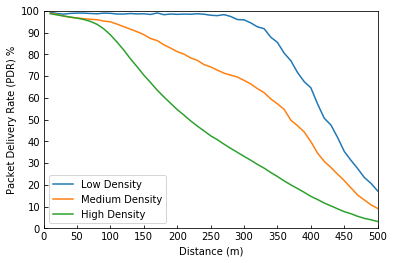

In [79]:
pdr_dist(motivational_pdr_graph, distances, ["Low Density", "Medium Density", "High Density"], "Motivation_pdr", show=True, store=True)


/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


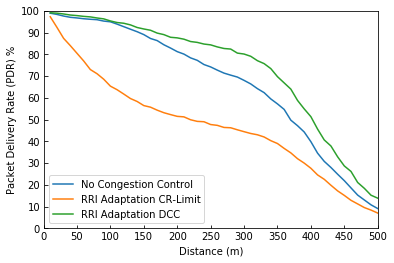

In [80]:
pdr_dist(rri, distances, ["No Congestion Control", "RRI Adaptation CR-Limit", "RRI Adaptation DCC"], "rri_pdr", show=True, store=True)


/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


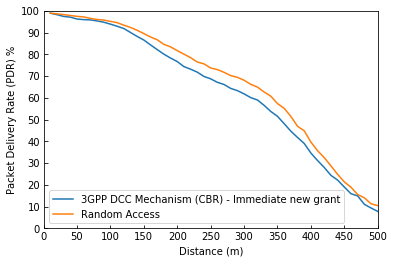

In [81]:
pdr_dist(random, distances, ["3GPP DCC Mechanism (CBR) - Immediate new grant", "Random Access"], "random_pdr", show=True, store=True)


/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


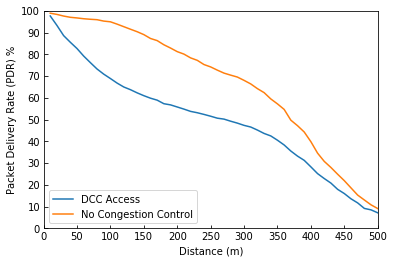

In [82]:
pdr_dist(dcc_pdr_medium, distances, ["DCC Access", "No Congestion Control"], "dcc_pdr", show=True, store=True)


/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


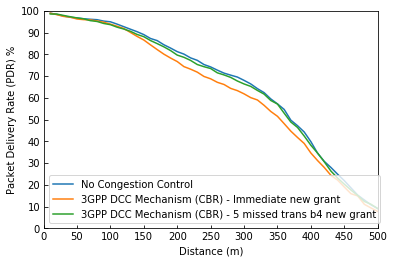

In [83]:
pdr_dist(packet_drop_medium, distances, ["No Congestion Control", "3GPP DCC Mechanism (CBR) - Immediate new grant", "3GPP DCC Mechanism (CBR) - 5 missed trans b4 new grant"], "Medium_pdr", show=True, store=True)

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


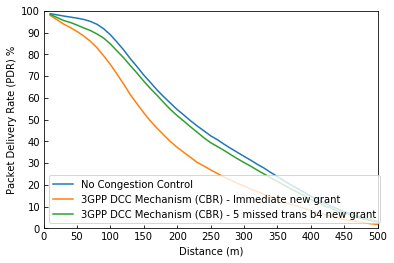

In [84]:
pdr_dist(packet_drop_high, distances, ["No Congestion Control", "3GPP DCC Mechanism (CBR) - Immediate new grant", "3GPP DCC Mechanism (CBR) - 5 missed trans b4 new grant"], "High_pdr", show=True, store=True)


### CBR 

Comparing CBR levels in DCC vs Non-DCC scenarios

In [73]:
def cbr_plot(cbrs, times, plot_name, labels, confidence_intervals=None, show=True, store=False):
    fig, ax = plt.subplots()

    for i in range(len(cbrs)):
        if confidence_intervals:
            ax.errorbar(times[i], cbrs[i], yerr=confidence_intervals[i], label=labels[i])
        else:
            ax.plot(times[i], cbrs[i], label=labels[i])

    ax.legend(loc='lower right')
    ax.set(xlabel='Time (s)', ylabel='Channel Busy Ratio %')
    ax.tick_params(direction='in')

    ax.set_ylim([0, 1])
    plt.yticks(np.arange(0, 1.1, step=.1))

#     fig.suptitle(plot_name, fontsize=12)

    if show:
        fig.show()

    if store:
        fig.savefig("{}.png".format(plot_name), dpi=300)
    plt.close(fig)

In [42]:
cbrs = {}
for configuration in interested_folder:
    df = loaded_dfs[configuration]
    
    df = df[df["cbr"] != np.nan]
    
    cbrs[configuration] = {"Time": df["Time"], "cbr": df["cbr"]}

In [85]:
random_cbr = []
random_times = []
random_labels = []
random_cbr.append(cbrs["After-1"]["cbr"])
random_times.append(cbrs["After-1"]["Time"])
random_labels.append("After-1")

random_cbr.append(cbrs["Random-Access-Medium-Density"]["cbr"])
random_times.append(cbrs["Random-Access-Medium-Density"]["Time"])
random_labels.append("Random Access")


motivational_cbr_graph = []
motivational_times = []
motivational_labels = []
motivational_cbr_graph.append(cbrs["Highway-fast"]["cbr"])
motivational_times.append(cbrs["Highway-fast"]["Time"])
motivational_labels.append("Low Density")

motivational_cbr_graph.append(cbrs["NO-CC"]["cbr"])
motivational_times.append(cbrs["NO-CC"]["Time"])
motivational_labels.append("Medium Density")

motivational_cbr_graph.append(cbrs["NO-CC-high-density"]["cbr"])
motivational_times.append(cbrs["NO-CC-high-density"]["Time"])
motivational_labels.append("High Density")


dcc_cbr_medium = []
dcc_times_medium = []
dcc_labels = []
dcc_cbr_medium.append(cbrs["DCC-Enabled"]["cbr"])
dcc_times_medium.append(cbrs["DCC-Enabled"]["Time"])
dcc_labels.append("DCC")

dcc_cbr_medium.append(cbrs["NO-CC"]["cbr"])
dcc_times_medium.append(cbrs["NO-CC"]["Time"])
dcc_labels.append("No Congestion Control")


packet_drop_medium_cbr = []
packet_drop_medium_time = []
packet_drop_labels = []
packet_drop_medium_cbr.append(cbrs["NO-CC"]["cbr"])
packet_drop_medium_time.append(cbrs["NO-CC"]["Time"])
packet_drop_labels.append("No Congestion Control")

packet_drop_medium_cbr.append(cbrs["After-1"]["cbr"])
packet_drop_medium_time.append(cbrs["After-1"]["Time"])
packet_drop_labels.append("3GPP DCC Mechanism (CBR) - Immediate new grant")

packet_drop_medium_cbr.append(cbrs["After-5"]["cbr"])
packet_drop_medium_time.append(cbrs["After-5"]["Time"])
packet_drop_labels.append("3GPP DCC Mechanism (CBR) - 5 missed trans b4 new grant")


packet_drop_high_cbr = []
packet_drop_high_time = []
packet_drop_high_labels = []
packet_drop_high_cbr.append(cbrs["NO-CC-high-density"]["cbr"])
packet_drop_high_time.append(cbrs["NO-CC-high-density"]["Time"])
packet_drop_high_labels.append("No Congestion Control")

packet_drop_high_cbr.append(cbrs["After-1-high-density"]["cbr"])
packet_drop_high_time.append(cbrs["After-1-high-density"]["Time"])
packet_drop_high_labels.append("3GPP DCC Mechanism (CBR) - Immediate new grant")

packet_drop_high_cbr.append(cbrs["After-5-high-density"]["cbr"])
packet_drop_high_time.append(cbrs["After-5-high-density"]["Time"])
packet_drop_high_labels.append("3GPP DCC Mechanism (CBR) - 5 missed trans b4 new grant")

rri_cbr = []
rri_times = []
rri_labels = []

rri_cbr.append(cbrs["NO-CC"]["cbr"])
rri_times.append(cbrs["NO-CC"]["Time"])
rri_labels.append("NO Congestion Control")

rri_cbr.append(cbrs["RRI-Adaptation-CR-limit-MD"]["cbr"])
rri_times.append(cbrs["RRI-Adaptation-CR-limit-MD"]["Time"])
rri_labels.append("RRI Adaptation CR-limit")

rri_cbr.append(cbrs["RRI-Adaptation-DCC-MD"]["cbr"])
rri_times.append(cbrs["RRI-Adaptation-DCC-MD"]["Time"])
rri_labels.append("RRI Adaptation DCC")

In [86]:
cbr_plot(random_cbr, random_times, "Random", random_labels, show=True, store=True)

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [87]:
cbr_plot(motivational_cbr_graph, motivational_times, "Motivation", motivational_labels, show=True, store=True)

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [88]:
cbr_plot(dcc_cbr_medium, dcc_times_medium, "DCC", dcc_labels, show=True, store=True)

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [89]:
cbr_plot(packet_drop_medium_cbr, packet_drop_medium_time, "Packet Drop Medium", packet_drop_labels, show=True, store=True)

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [90]:
cbr_plot(packet_drop_high_cbr, packet_drop_high_time, "Packet Drop High", packet_drop_high_labels, show=True, store=True)

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [91]:
cbr_plot(rri_cbr, rri_times, "RRI Adaptation", rri_labels, show=True, store=True)

/Users/brianmccarthy/anaconda3/envs/results-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


### Grant breaking

In [ ]:
print("Generated grants: {}".format(dcc_disabled_df["grantStartTime"].count()))
print("Broken grants: {}".format(dcc_disabled_df["grantBreak"].count()))

In [ ]:
# Higher due to the issue of starting at 502
print("Generated Grants: {}".format(dcc_enabled_df["grantStartTime"].count()))
print("Broken Grants: {}".format(dcc_enabled_df["grantBreakMissedTrans"].count()))

In [ ]:
print("Generated grants: {}".format(periodic_df["grantStartTime"].count()))
print("Broken grants: {}".format(periodic_df["grantBreak"].count()))

In [ ]:
# Higher due to the issue of starting at 502
print("Generated Grants: {}".format(non_periodic_df["grantStartTime"].count()))
print("Broken Grants: {}".format(non_periodic_df["grantBreakMissedTrans"].count()))

## Inter Packet Gap

In [ ]:
file_path_after_1 = "/Users/brianmccarthy/git_repos/results-analysis/data/raw_data/cv2x/After-1/run-1-2019-12-28-08_32_56.csv"
file_path_after_5 = "/Users/brianmccarthy/git_repos/results-analysis/data/raw_data/cv2x/After-5/run-1-2019-12-29-10_26_28.csv"
file_path_dcc_enabled = "/Users/brianmccarthy/git_repos/results-analysis/data/raw_data/cv2x/DCC-Enabled/run-1-2020-01-02-11_24_37.csv"

df_after_1 = pd.read_csv(file_path_after_1)
df_after_5 = pd.read_csv(file_path_after_5)
df_dcc_enabled = pd.read_csv(file_path_dcc_enabled)

df_after_1 = df_after_1[(df_after_1["Time"] >= 502.000) & (df_after_1["interPacketDelay"].notnull()) & (df_after_1["txRxDistanceTB"] <= 500)]
df_after_5 = df_after_5[(df_after_5["Time"] >= 502.000) & (df_after_5["interPacketDelay"].notnull()) & (df_after_5["txRxDistanceTB"] <= 500)]
df_dcc_enabled = df_dcc_enabled[(df_dcc_enabled["Time"] >= 502.000) & (df_dcc_enabled["interPacketDelay"].notnull()) & (df_dcc_enabled["txRxDistanceTB"] <= 500)]

In [ ]:
print("==============================")
print("========= After-1 ===========")
print("Mean: {}".format(df_after_1["interPacketDelay"].mean()))
print("Median: {}".format(df_after_1["interPacketDelay"].median()))
print("Lower Quartile: {}".format(df_after_1["interPacketDelay"].quantile(.25)))
print("Upper Quartile: {}".format(df_after_1["interPacketDelay"].quantile(.75)))
print("==============================")

print("==============================")
print("========= After-5 ===========")
print("Mean: {}".format(df_after_5["interPacketDelay"].mean()))
print("Median: {}".format(df_after_5["interPacketDelay"].median()))
print("Lower Quartile: {}".format(df_after_5["interPacketDelay"].quantile(.25)))
print("Upper Quartile: {}".format(df_after_5["interPacketDelay"].quantile(.75)))
print("==============================")

print("==============================")
print("======= DCC Enabled ==========")
print("Mean: {}".format(df_dcc_enabled["interPacketDelay"].mean()))
print("Median: {}".format(df_dcc_enabled["interPacketDelay"].median()))
print("Lower Quartile: {}".format(df_dcc_enabled["interPacketDelay"].quantile(.25)))
print("Upper Quartile: {}".format(df_dcc_enabled["interPacketDelay"].quantile(.75)))
print("==============================")

In [ ]:
delays = []
delays.append(df_after_1["interPacketDelay"].values)
delays.append(df_after_5["interPacketDelay"].values)
delays.append(df_dcc_enabled["interPacketDelay"].values)

labels = ["After-1", "After-5", "DCC-Enabled"]

In [ ]:
box_plot(delays, labels , "latency Box plot", "latency Box plot")